# CSGO Round winner classification
### URL : https://www.kaggle.com/christianlillelund/csgo-round-winner-classification

### Import du dataset

In [104]:
import seaborn as sns; sns.set()
import pandas as pd

df_csgo = pd.read_csv('csv_files/csgo_round_snapshots.csv')

### On affiche la shape du dataset et on affiche ses colonnes

In [102]:
df_csgo.shape

(122410, 96)

In [4]:
df_csgo.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     

In [5]:
df_csgo.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


### On retire la colonne 'map' qui n'a peu d'importance sur la victoire d'un round 
    (Réalité : Problème de passage de string en valeur numérique)
### Et DropNA pour s'assurer de ne pas avoir de valeur nulle

In [3]:
df_csgo = df_csgo.drop('map', axis='columns')

In [7]:
df_csgo = df_csgo.dropna()

### Séparation des FEATURES de la TARGET
#### La target étant "round_winner" et les features tout le reste

In [4]:
X = df_csgo.drop('round_winner', axis="columns")
Y = df_csgo['round_winner'].astype('category').cat.codes

### Puis on affiche les shape de X et Y

In [5]:
X.shape, Y.shape

((122410, 95), (122410,))

### Train Test Split

In [6]:
#Import de train_test_split depuis sklearn
from sklearn.model_selection import train_test_split

splits = train_test_split (X, Y, train_size=0.35, stratify=Y, random_state=25)

xTrain, xTest, yTrain, yTest = splits

### On regarde le résultat avec KNearestNeighbors

#### Train du model

In [67]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn = KNN(n_neighbors=1)

knn.fit(xTrain, yTrain)

KNeighborsClassifier(n_neighbors=1)

#### Predict et affichage du score (acurracy)

In [69]:
knn.score(xTest, yTest)

0.7501225382382143

### On regarde le résultat avec SVC

#### Train du model

In [106]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(xTrain, yTrain)

SVC()

#### Predict et affichage du score (acurracy)

In [107]:
svc.score(xTest, yTest)

0.7075295034373547

### On regarde le résultat avec GaussianNB

#### Train du model

In [29]:
from sklearn.naive_bayes import GaussianNB as GNB

gnb = GNB()

gnb.fit(xTrain, yTrain)

GaussianNB()

#### Predict et affichage du score (acurracy)

In [70]:
gnb.score(xTest, yTest)

0.7315721341762288

### On regarde le résultat avec SGDClassifier

#### Train du model

In [71]:
from sklearn.linear_model import SGDClassifier as SGD

sgd = SGD(
    alpha=10.0
)

sgd.fit(xTrain, yTrain)

SGDClassifier(alpha=10.0)

#### Predict et affichage du score (acurracy)

In [72]:
preds = sgd.predict(xTest)

sgd.score(xTest, yTest)

0.6799803938818857

### On regarde le résultat avec RandomForestClassifier

#### Train du model

In [91]:
from sklearn.ensemble import RandomForestClassifier as RFC

rfc = RFC(n_estimators=150,random_state=12)

rfc.fit(xTrain, yTrain)

RandomForestClassifier(n_estimators=150, random_state=12)

#### Predict et affichage du score (acurracy)

In [92]:
rfc.score(xTest, yTest)

0.8287103950130079

### On crée une matrice de confusion
#### Permet de voir le nombre de fois où l'algo s'est trompé dans ses prédictions

In [110]:
from sklearn.metrics import confusion_matrix
#labels = iris['species'].unique()
preds = rfc.predict(xTest)
labels = range(2)
cm = confusion_matrix(preds, yTest, labels=labels)

### Et on affiche la matrice sous forme de heatmap pour la rendre plus lisible

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
labels = df_csgo['round_winner'].unique()
def show_cm(cm, labels):
    df_cm = pd.DataFrame(cm, labels, labels)
    sns.heatmap(df_cm, annot=True, cmap="hot", fmt='g')
    plt.xlabel("Predictions")
    plt.ylabel("Realité")
    plt.show()

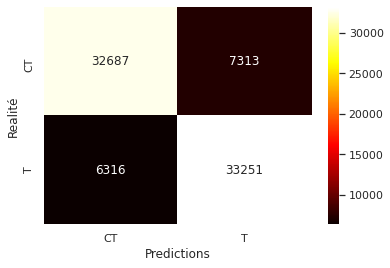

In [128]:
show_cm(cm, labels)

### Résultat :
- 6316 prédiction d'une victoire CT (Counter Terrorist) alors que la victoire était T (Terroris) et 32687 bonnes prédictions d'une victoire CT
- 7313 prédictions d'une victoire T alors que le résultat était CT, et 33251 bonnes prédictions d'une victoire T